<a href="https://colab.research.google.com/github/zayeem00/MLProject_TeessideUni/blob/master/Copy_of_Feature_Selection(Random_Forest)%2C_ElasticNet%2Cridge%2CLasso_on_LUAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
os.chdir('U:\ProjectDataset')   #setting the directory

In [0]:
dt=pd.read_excel('LUAD.xlsx')   #importing the data 

In [0]:
dt=dt.set_index(dt.columns[0])

In [0]:
tar=pd.read_excel('survival_LUAD.xlsx')    #importing the target variable

In [0]:
import numpy as np
y=np.array(tar)
y=y.flatten()            #flattenig the target variable for RandomForestRegressor 

In [0]:
from sklearn.ensemble import RandomForestRegressor     #applying the random forest regressor 
model=RandomForestRegressor(random_state=1,max_depth=10)
df=pd.get_dummies(df)     
model.fit(df,y)         

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

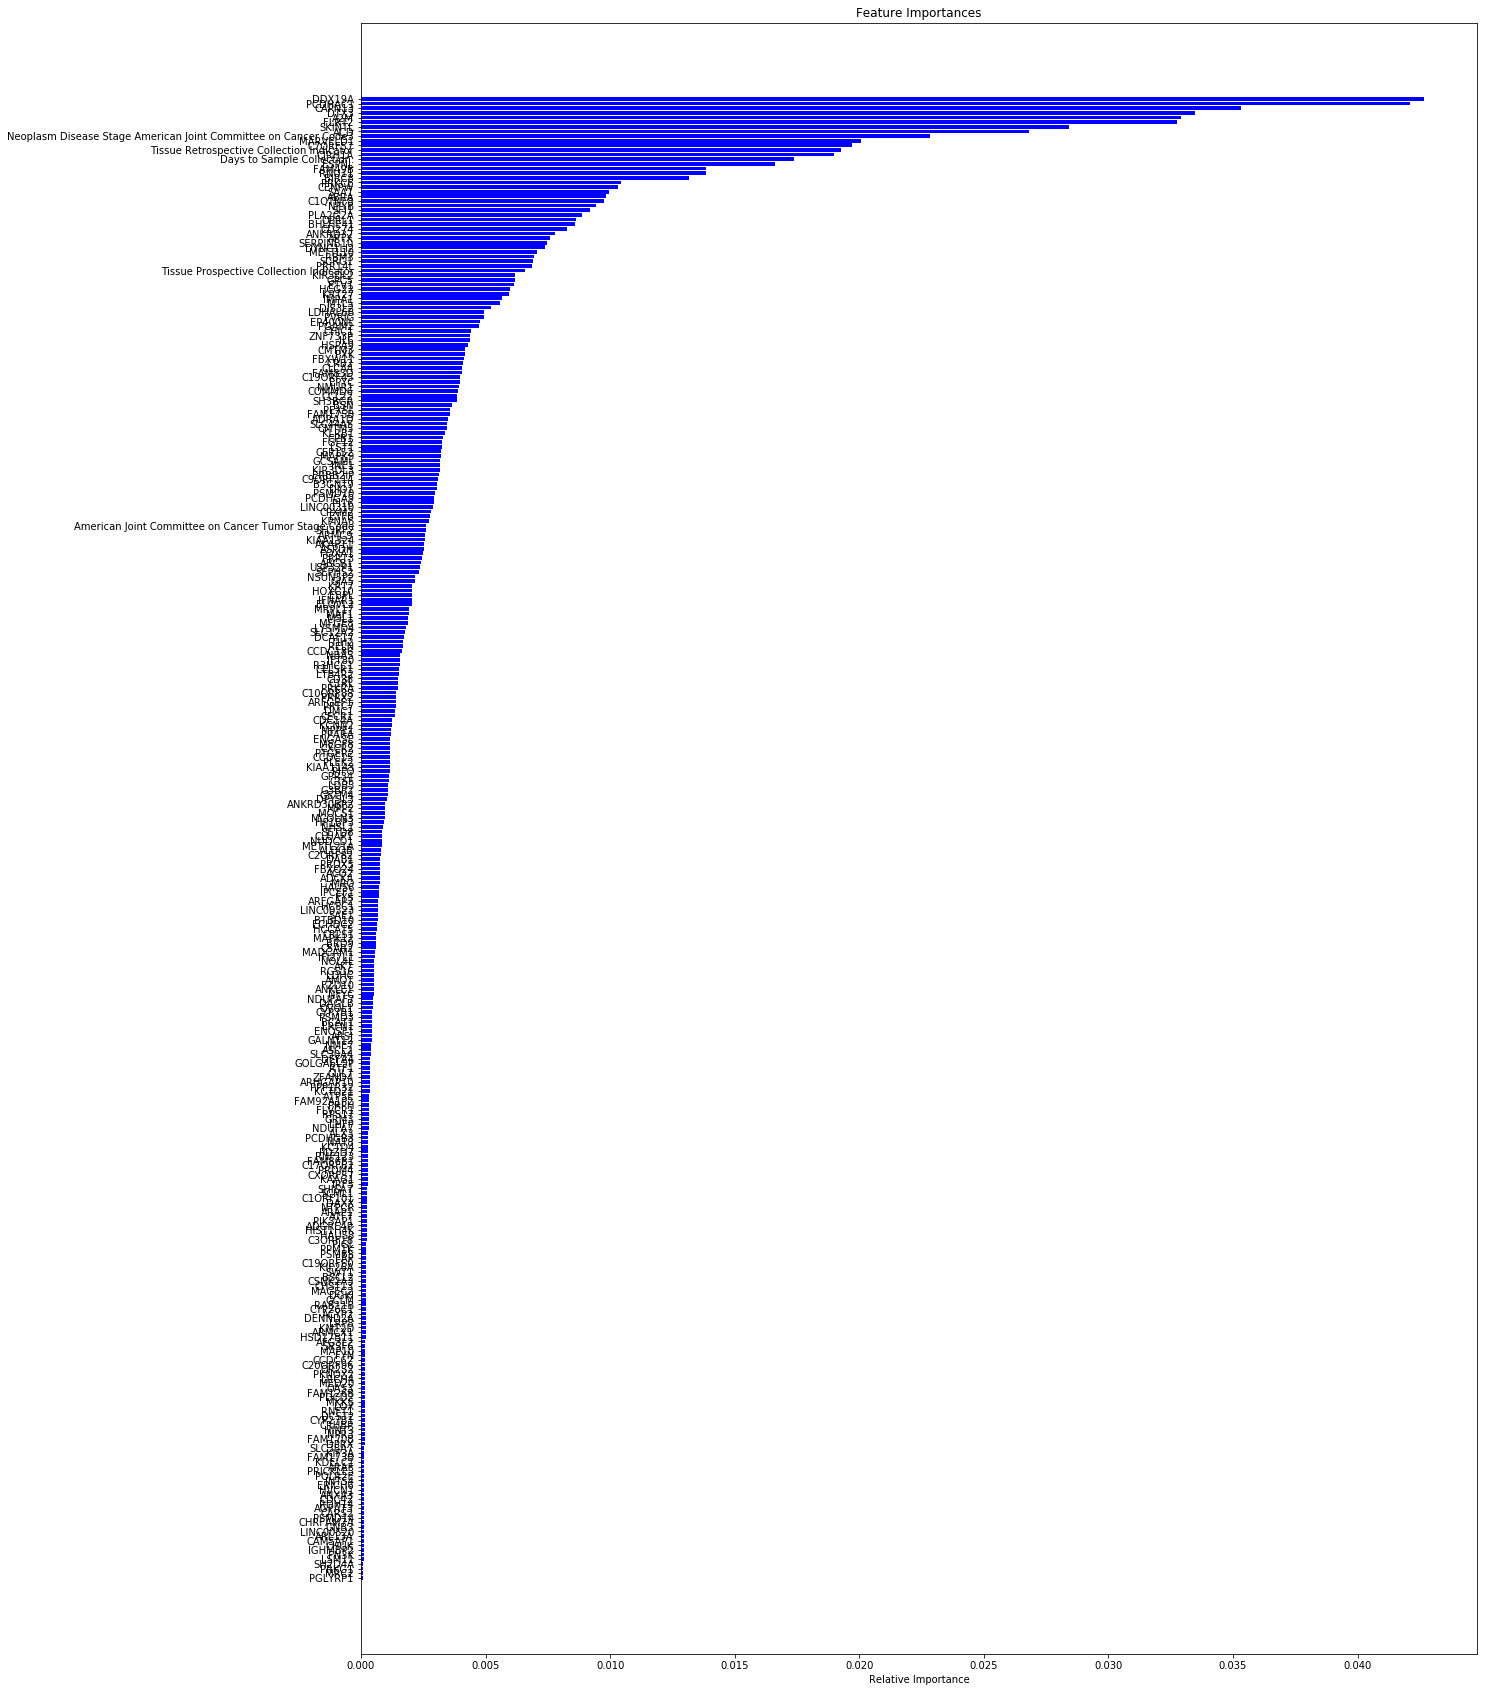

<Figure size 432x288 with 0 Axes>

In [0]:
# plotting the top 320 feature variables according to their importance
features = df.columns
importances = model.feature_importances_
plt.figure(figsize=(20,30))
indices = np.argsort(importances)[-320:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('LUAD.png')

In [0]:
features=[features[i] for i in indices]    

In [0]:
len(features)

320

In [0]:
column=df.columns

In [0]:
len(column)

14828

In [0]:
df.shape

(517, 320)

In [0]:
i=pd.DataFrame({'Col':imp})

In [0]:
df.to_excel('LUAD_320features.xlsx')    #storing the new dataset to local computer

In [0]:
!!!!!!!!!!!!!!!!!!!!!!!!!!!! with 320 features and no cheating variables !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [0]:
''' Importaing all the data sets after manually splitting the data to 80% train and 20% test data'''

In [0]:
X_train=pd.read_excel('LUAD_320features_train.xlsx',index_col=0)    

In [0]:
X_test=pd.read_excel('LUAD_320features_test.xlsx',index_col=0)

In [0]:
Y_train=pd.read_excel('survival_LUAD_Trainset.xlsx')

In [0]:
Y_test=pd.read_excel('LUAD_Survival_testset.xlsx')

In [0]:
                                       '''ELASTIC NET REGRESSION'''

In [0]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from statistics import mean
from sklearn.linear_model import Lasso

In [0]:
import numpy as np 
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)

In [0]:
                                 '''alpha = 0.1 and l_ratio=0.5'''
train=[]         
test=[]
#kfold splits the training data to validation set(test index),train set(train set)
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)
    ENreg.fit(x_train,y_train)                #fitting the train data
    pred_cv = ENreg.predict(x_test)           #predicting using the test data  
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


train
0.8875710562485237
test
-1.3159595842276512


In [0]:
                           '''alpha = 0.1 and l_ratio=0.9'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=0.1, l1_ratio=0.9, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


train
0.9095112542485232
test
-1.6298478527099425


In [0]:
                       '''alpha = 1 and l_ratio=0.5'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

train
0.6498438000515564
test
0.010693241510100824


In [0]:
                  '''alpha = 1 and l_ratio=0.9''' 
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=1, l1_ratio=0.9, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

train
0.6447365346259829
test
0.034537750037885444


In [0]:
            '''alpha = 5 and l_ratio=0.5'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=5, l1_ratio=0.5, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

train
0.3639708860879354
test
0.027217576262066896


In [0]:
                '''alpha = 5 and l_ratio=0.9'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=5, l1_ratio=0.9, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

train
0.32285753036580733
test
0.08328911755406986


In [0]:
                   '''alpha = 10 and l_ratio=0.5'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=10, l1_ratio=0.5, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

train
0.2659728884036102
test
0.018018962056103285


In [0]:
            '''alpha = 10 and l_ratio=0.9'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=10, l1_ratio=0.9, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

train
0.2543733001399161
test
0.07463073807142648


In [0]:
                '''alpha = 20 and l_ratio=0.5'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=20, l1_ratio=0.5, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

train
0.20124399579143168
test
0.02752802414429937


In [0]:
               '''alpha = 20 and l_ratio=0.9'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=20, l1_ratio=0.9, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test')
print(mean(test))

train
0.19494015023732802
test
0.08142546090663288


In [0]:
           '''alpha = 30 and l_ratio=0.5'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=30, l1_ratio=0.5, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.17067240275796491
test
0.06783295575915055


In [0]:
             '''alpha = 30 and l_ratio=0.9'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=30, l1_ratio=0.9, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.14688005511566238
test
0.05464491165702188


In [0]:
                          '''alpha = 40 and l_ratio=0.5'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=40, l1_ratio=0.5, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.1516859492617103
test
0.055396221378433405


In [0]:
                  '''alpha = 40 and l_ratio=0.9'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=40, l1_ratio=0.9, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.12990308318632005
test
0.09425815150003397


In [0]:
               '''alpha = 60 and l_ratio=0.9'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=60, l1_ratio=0.9, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.12953414705283875
test
0.0766601469481962


In [0]:
             '''alpha = 40 and l_ratio=0.9 and n_repeats=10 '''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    ENreg = ElasticNet(alpha=40, l1_ratio=0.9, normalize=False)
    ENreg.fit(x_train,y_train)
    pred_cv = ENreg.predict(x_test)
    train.append(ENreg.score(x_train,y_train))
    test.append(ENreg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.1310774275554616
test
0.07794615471846013


In [0]:
                                  '''Ridge Regression'''

In [0]:
X_train.shape

(417, 320)

In [0]:
          '''alpha=0.001'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    ridgeReg=Ridge(alpha=0.001,normalize=False)
    ridgeReg.fit(x_train,y_train)
    predictions=ridgeReg.predict(x_test)
    train.append(ridgeReg.score(x_train,y_train))
    test.append(ridgeReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.9832234025509122
test
-77.54182175246373


In [0]:
                  '''alpha=0.1'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    ridgeReg=Ridge(alpha=0.1,normalize=False)
    ridgeReg.fit(x_train,y_train)
    predictions=ridgeReg.predict(x_test)
    train.append(ridgeReg.score(x_train,y_train))
    test.append(ridgeReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.9808371959967946
test
-36.54668315222513


In [0]:
               '''alpha=1'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    ridgeReg=Ridge(alpha=1,normalize=False)
    ridgeReg.fit(x_train,y_train)
    predictions=ridgeReg.predict(x_test)
    train.append(ridgeReg.score(x_train,y_train))
    test.append(ridgeReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.9683087101572372
test
-12.126955469571488


In [0]:
             '''alpha=10'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    ridgeReg=Ridge(alpha=10,normalize=False)
    ridgeReg.fit(x_train,y_train)
    predictions=ridgeReg.predict(x_test)
    train.append(ridgeReg.score(x_train,y_train))
    test.append(ridgeReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.9234894281219698
test
-2.1182132766772246


In [0]:
         '''alpha=20'''
train=[]
test=[]
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    ridgeReg=Ridge(alpha=20,normalize=False)
    ridgeReg.fit(x_train,y_train)
    predictions=ridgeReg.predict(x_test)
    train.append(ridgeReg.score(x_train,y_train))
    test.append(ridgeReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.8950356342817389
test
-1.4691933490553173


In [0]:
              '''alpha=30'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    ridgeReg=Ridge(alpha=30,normalize=False)
    ridgeReg.fit(x_train,y_train)
    predictions=ridgeReg.predict(x_test)
    train.append(ridgeReg.score(x_train,y_train))
    test.append(ridgeReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.8758176432405486
test
-0.9916849677100765


In [0]:
        '''alpha=40'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    ridgeReg=Ridge(alpha=40,normalize=False)
    ridgeReg.fit(x_train,y_train)
    predictions=ridgeReg.predict(x_test)
    train.append(ridgeReg.score(x_train,y_train))
    test.append(ridgeReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.8599922011936509
test
-0.9384794797454561


In [0]:
              '''alpha=30 and n_splits=10'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    ridgeReg=Ridge(alpha=30,normalize=False)
    ridgeReg.fit(x_train,y_train)
    predictions=ridgeReg.predict(x_test)
    train.append(ridgeReg.score(x_train,y_train))
    test.append(ridgeReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.8769275914047303
test
-1.175997935130392


In [0]:
                                    '''Lasso Regression'''

In [0]:
           '''alpha=0.001'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    lassoReg=Lasso(alpha=0.001,normalize=False)
    lassoReg.fit(x_train,y_train)
    predictions=lassoReg.predict(x_test)
    train.append(lassoReg.score(x_train,y_train))
    test.append(lassoReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


train
0.9807536280398838
test
-19.769465093057338


In [0]:
              '''alpha=5'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    lassoReg=Lasso(alpha=0.1,normalize=False)
    lassoReg.fit(x_train,y_train)
    predictions=lassoReg.predict(x_test)
    train.append(lassoReg.score(x_train,y_train))
    test.append(lassoReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


train
0.9160060203208171
test
-1.8046725707666584


In [0]:
                '''alpha=1'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    lassoReg=Lasso(alpha=1,normalize=False)
    lassoReg.fit(x_train,y_train)
    predictions=lassoReg.predict(x_test)
    train.append(lassoReg.score(x_train,y_train))
    test.append(lassoReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.6510933724209002
test
0.17844799881746887


In [0]:
                '''alpha=10'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    lassoReg=Lasso(alpha=10,normalize=False)
    lassoReg.fit(x_train,y_train)
    predictions=lassoReg.predict(x_test)
    train.append(lassoReg.score(x_train,y_train))
    test.append(lassoReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.253845316094076
test
0.029180087005063225


In [0]:
              '''alpha=20'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    lassoReg=Lasso(alpha=20,normalize=False)
    lassoReg.fit(x_train,y_train)
    predictions=lassoReg.predict(x_test)
    train.append(lassoReg.score(x_train,y_train))
    test.append(lassoReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.19487985537390992
test
0.06654876089716771


In [0]:
            '''alpha=30'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    lassoReg=Lasso(alpha=30,normalize=False)
    lassoReg.fit(x_train,y_train)
    predictions=lassoReg.predict(x_test)
    train.append(lassoReg.score(x_train,y_train))
    test.append(lassoReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.13415288410598106
test
0.0924391877212325


In [0]:
     '''alpha=40'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    lassoReg=Lasso(alpha=40,normalize=False)
    lassoReg.fit(x_train,y_train)
    predictions=lassoReg.predict(x_test)
    train.append(lassoReg.score(x_train,y_train))
    test.append(lassoReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.1294952853752442
test
0.08458806619453949


In [0]:
            '''alpha=1 and n_splits=10'''
train=[]
test=[] 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
a=1
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    from sklearn.linear_model import Ridge
    lassoReg=Lasso(alpha=1,normalize=False)
    lassoReg.fit(x_train,y_train)
    predictions=lassoReg.predict(x_test)
    train.append(lassoReg.score(x_train,y_train))
    test.append(lassoReg.score(x_test,y_test))
print('train')
print(mean(train))
print('test') 
print(mean(test))

train
0.6498162735323338
test
0.07437781975946693
